In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


In [11]:
df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_2024.csv')
import pandas as pd
start_col = 'Atl_croaker_(nibea98)'
start_index = df.columns.get_loc(start_col)
df.iloc[:, start_index:] = (df.iloc[:, start_index:] > 0).astype(int)
fish_asvs = df.iloc[:, 11:]
fish_asvs

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,Atl_herring,Atl_cod,Am_gizzard_shad,Fourspine_stickleback,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon
0,0,1,1,1,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
85,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
86,1,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
87,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## PCA

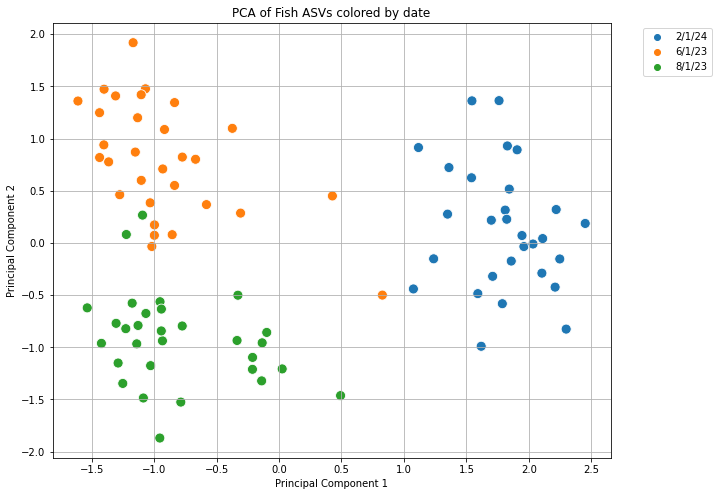

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fish_asvs)

# Add PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# color by date
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='date', s=100, palette='tab10')
# plt.title('PCA of Fish ASVs colored by date')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['PCA1'].iloc[i], data['PCA2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('PCA of Fish ASVs colored by date')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## TSNE

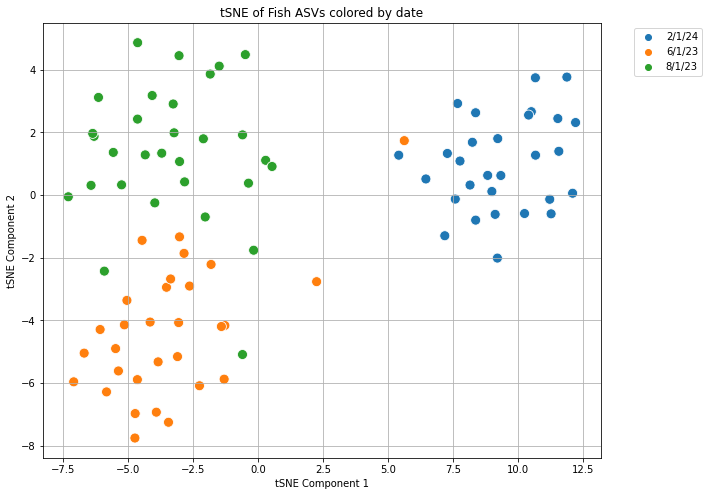

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=30, perplexity=20, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')
# plt.title('t-SNE of Fish ASVs colored by Date')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=df, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('tSNE of Fish ASVs colored by date')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



### Save data

In [14]:
selected_columns = df[['tSNE1', 'tSNE2', 'date']]
selected_columns.to_csv('tsne_prab_latent_space.csv', index=False)


In [15]:
selected_columns = df[['PCA1', 'PCA2', 'date']]
selected_columns.to_csv('pca_prab_latent_space.csv', index=False)


In [19]:
df = df.drop(['PCA1','PCA2','tSNE1','tSNE2'], axis=1)
df.to_csv('data_prab.csv', index=False)
